In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd 
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn
import random 
import time 

from sklearn import preprocessing, model_selection


from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



This is a very basic example of a construction of a neural network that allows for a multiclass classification with tensorflow keras.

In [2]:
data = pd.read_csv('../input/rpm-data/1200rpm.csv')
data.drop(['Sno'],axis=1)

,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,-0.514532,0.000039,0.679088,0.468711,0.014596,0.234375,0.015186,0.234375,0.020994,0.018309,0.144892,0.135311,0.116586,-1.2,-0.023177,5.780000e-10,1
1,-0.551068,0.468789,0.555852,0.937461,0.014873,0.703125,0.014412,0.703125,0.020695,0.018309,0.143858,0.135311,0.063281,-1.2,-0.023856,-1.140000e-10,1
2,-0.591889,0.937539,0.628330,1.406211,0.016387,1.171875,0.016316,1.171875,0.020610,0.018309,0.143560,0.135311,0.095484,-1.2,-0.016565,-1.140000e-10,1
3,-0.521137,1.406289,0.615120,1.874961,0.016488,1.640625,0.016316,1.640625,0.019657,0.018309,0.140202,0.135311,0.140740,-1.2,0.000706,-1.140000e-10,1
4,-0.562612,1.875039,0.578881,2.343711,0.016652,2.109375,0.018339,2.109375,0.020883,0.018309,0.144509,0.135311,0.117727,-1.2,-0.018211,-1.140000e-10,1
5,-0.531193,2.343789,0.598934,2.812461,0.016652,2.578125,0.016435,2.578125,0.020593,0.018309,0.143501,0.135311,0.181350,-1.2,0.011544,-1.140000e-10,1
6,-0.658654,2.812539,0.686407,3.281211,0.015965,3.046875,0.018280,3.046875,0.020607,0.018309,0.143550,0.135311,0.283299,-1.2,-0.063404,-1.140000e-10,1
7,-0.563743,3.281289,0.613037,3.749961,0.015941,3.515625,0.017328,3.515625,0.020579,0.018309,0.143453,0.135311,0.064535,-1.2,-0.034101,-1.140000e-10,1
8,-0.589509,3.750039,0.525921,4.218711,0.015496,3.984375,0.016257,3.984375,0.020552,0.018309,0.143358,0.135311,0.126524,-1.2,-0.049904,-1.140000e-10,1
9,-0.571657,4.218789,0.561029,4.687461,0.015859,4.453125,0.016316,4.453125,0.021375,0.018309,0.146204,0.135311,0.078569,-1.2,-0.019598,-1.140000e-10,1



We are going to separate the data. One part will be used to make predictions in the end, the other part, the most important will be used for training and testing the neural network.
This part is not mandatory, but it is for fun, and especially to show how to predict from an input.

In [3]:
X = data.drop(['class'], axis = 1)
X = np.array(X)
Y = data['class']




In [4]:
X

array([[ 0.00000000e+00, -5.14532000e-01,  3.91000000e-05, ...,
        -1.19999999e+00, -2.31765500e-02,  5.78000000e-10],
       [ 1.00000000e+00, -5.51068000e-01,  4.68789000e-01, ...,
        -1.19999999e+00, -2.38558600e-02, -1.14000000e-10],
       [ 2.00000000e+00, -5.91889000e-01,  9.37539000e-01, ...,
        -1.19999999e+00, -1.65654640e-02, -1.14000000e-10],
       ...,
       [ 2.89000000e+02, -5.43214000e-01,  1.35468789e+02, ...,
        -1.19999999e+00,  9.96117100e-03, -1.14000000e-10],
       [ 2.90000000e+02, -5.98673000e-01,  1.35937539e+02, ...,
        -1.19999999e+00, -9.50415400e-03, -1.14000000e-10],
       [ 2.91000000e+02, -6.23070000e-01,  1.36406289e+02, ...,
        -1.19999999e+00, -1.26912150e-02, -1.14000000e-10]])

In [5]:
Y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1513    5
1514    5
1515    5
1516    5
1517    5
1518    5
1519    5
1520    5
1521    5
1522    5
1523    5
1524    5
1525    5
1526    5
1527    5
1528    5
1529    5
1530    5
1531    5
1532    5
1533    5
1534    5
1535    5
1536    5
1537    5
1538    5
1539    5
1540    5
1541    5
1542    5
Name: class, Length: 1543, dtype: int64


We must transform the column of classes, because we have a format 'str', and it is a multiclass situation. We must first convert the names of species into numerical values, then into vectors for the output of the neuron network. 


In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print(X)

[[0.         0.84028894 0.         ... 0.         0.42732493 1.        ]
 [0.00318471 0.79954884 0.00318471 ... 1.         0.4231451  0.        ]
 [0.00636943 0.75403069 0.00636943 ... 1.         0.46800334 0.        ]
 ...
 [0.92038217 0.80830658 0.92038217 ... 1.         0.63122329 0.        ]
 [0.92356688 0.74646607 0.92356688 ... 1.         0.511452   0.        ]
 [0.92675159 0.71926178 0.92675159 ... 1.         0.49184182 0.        ]]


In [7]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.1, random_state = 0)


In [8]:
y_test = test_y
y_test

1041    4
159     1
1456    5
744     3
790     3
685     3
898     3
82      1
520     2
870     3
1142    4
1280    5
724     3
527     2
361     2
794     3
936     3
66      1
958     4
171     1
1133    4
9       1
342     2
465     2
53      1
299     1
641     3
54      1
229     1
1292    5
       ..
787     3
966     4
458     2
479     2
89      1
192     1
1124    4
762     3
1373    5
516     2
489     2
1091    4
427     2
435     2
574     2
175     1
1527    5
693     3
1338    5
620     2
376     2
526     2
191     1
14      1
1450    5
152     1
1321    5
824     3
1116    4
1290    5
Name: class, Length: 155, dtype: int64

In [9]:
# Transform name species into numerical values 
encoder = LabelEncoder()
encoder.fit(train_y )
train_y = encoder.transform(train_y)
train_y = np_utils.to_categorical(train_y )
print(train_y )

# We have 3 classes : the output looks like : 
#0,0,1 : Class 1
#0,1,0 : Class 2
#1,0,0 : Class 3

encoder = LabelEncoder()
encoder.fit(test_y)
test_y = encoder.transform(test_y)
test_y = np_utils.to_categorical(test_y )
print(test_y)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0.

In [10]:
X

array([[0.        , 0.84028894, 0.        , ..., 0.        , 0.42732493,
        1.        ],
       [0.00318471, 0.79954884, 0.00318471, ..., 1.        , 0.4231451 ,
        0.        ],
       [0.00636943, 0.75403069, 0.00636943, ..., 1.        , 0.46800334,
        0.        ],
       ...,
       [0.92038217, 0.80830658, 0.92038217, ..., 1.        , 0.63122329,
        0.        ],
       [0.92356688, 0.74646607, 0.92356688, ..., 1.        , 0.511452  ,
        0.        ],
       [0.92675159, 0.71926178, 0.92675159, ..., 1.        , 0.49184182,
        0.        ]])

In [11]:
Y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1513    5
1514    5
1515    5
1516    5
1517    5
1518    5
1519    5
1520    5
1521    5
1522    5
1523    5
1524    5
1525    5
1526    5
1527    5
1528    5
1529    5
1530    5
1531    5
1532    5
1533    5
1534    5
1535    5
1536    5
1537    5
1538    5
1539    5
1540    5
1541    5
1542    5
Name: class, Length: 1543, dtype: int64


It's time to build our neural network. The dimension in input is the number of features of the dataframe (without the class to predict!).

We are on a multiclass classification situation, so the activation function for the last most suitable layer is "softmax", and "categorical_crossentropy" for the loss.

We have to do several tests to find the best architecture, but this one works pretty well

In [12]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 

input_dim = len(data.columns) - 1

model = Sequential()
model.add(Dense(200, input_dim = input_dim , activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_x, train_y, epochs = 50, batch_size = 32)

scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/50
1388/1388 [==============================] - 1s 412us/step - loss: 1.4165 - acc: 0.4107
Epoch 2/50
1388/1388 [==============================] - 0s 61us/step - loss: 1.0584 - acc: 0.5519
Epoch 3/50
1388/1388 [==============================] - 0s 64us/step - loss: 0.8674 - acc: 0.6390
Epoch 4/50
1388/1388 [==============================] - 0s 62us/step - loss: 0.7375 - acc: 0.7205
Epoch 5/50
1388/1388 [==============================] - 0s 63us/step - loss: 0.6598 - acc: 0.7428
Epoch 6/50
1388/1388 [==============================] - 0s 60us/step - loss: 0.6357 - acc: 0.7442
Epoch 7/50
1388/1388 [==============================] - 0s 58us/step - loss: 0.6090 - acc: 0.7471
Epoch 8/50
1388/1388 [==============================] - 0s 61us/step - loss: 0.5839 - acc: 0.7673
Epoch 9/50
1388/1388 [==============================] - 0s 61us/step - loss: 0.5631 - acc: 0.7695
Epoch 10/50
1388/1388 [==============================] - 0s 60us/step - loss: 0.5546 - acc: 0.7637
Epoch 11/50
1388/1


It is time to make predictions with the small sample removed from the base at the beginning.
To train the neural network it was necessary to convert the species into vectors. So after the prediction it is necessary to carry out the opposite operation to recover the name of the associated species

In [13]:
predictions = model.predict_classes(test_x)
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_ = encoder.inverse_transform(prediction_)
prediction_

# for i, j in zip(prediction_ , predict_species):
#     print( " the nn predict {}, and the species to find is {}".format(i,j))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([4, 1, 5, 3, 3, 4, 3, 1, 2, 3, 4, 5, 3, 2, 4, 3, 3, 1, 4, 1, 5, 1,
       3, 2, 1, 2, 3, 1, 1, 3, 4, 5, 4, 4, 4, 2, 2, 5, 2, 2, 5, 2, 4, 1,
       5, 4, 4, 3, 1, 4, 5, 3, 5, 4, 5, 2, 2, 2, 2, 1, 1, 1, 1, 4, 5, 2,
       2, 5, 3, 2, 4, 5, 2, 5, 3, 4, 2, 4, 3, 4, 5, 2, 4, 3, 2, 4, 3, 3,
       2, 1, 2, 4, 2, 4, 2, 2, 2, 2, 5, 3, 5, 4, 2, 2, 4, 4, 4, 1, 2, 1,
       5, 4, 2, 4, 3, 2, 2, 2, 4, 3, 4, 5, 1, 5, 1, 3, 4, 4, 2, 1, 1, 3,
       3, 5, 2, 2, 4, 4, 4, 2, 2, 5, 3, 3, 2, 2, 2, 1, 1, 4, 1, 5, 3, 2,
       3])

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction_))

             precision    recall  f1-score   support

          1       0.96      0.64      0.77        36
          2       0.60      0.68      0.64        38
          3       0.79      0.96      0.86        23
          4       0.62      0.79      0.70        29
          5       0.96      0.76      0.85        29

avg / total       0.78      0.75      0.75       155



Text(0.5,1,'Confusion Matrix')

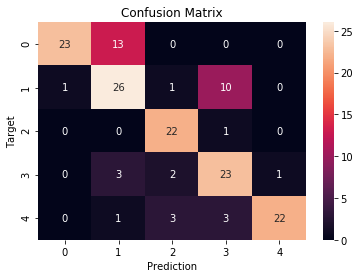

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
cf = confusion_matrix(y_test, prediction_)
plt.figure()
sb.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')